# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [60]:
import numpy as np

### Simulation du lancé de dé

In [61]:
def Roll():
    return int(np.random.choice(range(1,20),1))

In [62]:
Roll()


19

### Compléter le code et commenter

In [120]:
A=0
NA=0
S=10
temp = Roll()
#NA=1
#np.random.seed(10)
while temp != 6:
    NA=NA+1
    temp = Roll()
    print("temp =>",temp," NA =>",NA)
   
A = 1
print(NA)
while temp != S:
    NA=NA+1
    temp = Roll()
    if A+temp < S:
        A+=temp
        print("temp =>",temp," NA =>",NA," A =>",A)
    elif A+temp == S:
        A=s
        print("temp =>",temp," NA =>",NA," A =>",A)



temp => 5  NA => 1
temp => 13  NA => 2
temp => 14  NA => 3
temp => 6  NA => 4
4
temp => 3  NA => 5  A => 4
temp => 2  NA => 6  A => 6
temp => 2  NA => 7  A => 8


In [43]:
#A=0
#NA=0
#S=10
#c=0
#while (A<S) :
#    pass

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [105]:
def sim(s):
    A=0
    NA=0
    c=0
    temp = Roll()
    #NA=1
    #np.random.seed(10)
    while temp != 6:
        temp = Roll()
        #print("temp =>",temp," NA =>",NA)

    A = 1
    #print(NA)
    while temp != S:
        NA=NA+1
        temp = Roll()
        if A+temp < S:
            A+=temp
            #print("temp =>",temp," NA =>",NA," A =>",A)
        elif A+temp == S:
            A=s
            #print("temp =>",temp," NA =>",NA," A =>",A)
    return NA
    

In [106]:
sim(20)

62

# Simulation de $10^5$  scénario 

In [109]:
Freq=np.fromiter((sim(20) for i in range(10**2)),dtype=int)
print(Freq)

[ 16   8  12  75 129   8   2   3   4   1   5  34   3   8   5   4  10  13
  44   2  26   2  20  25   5  18  12   6  27  36  14   6   3   9   8  32
  15  10  54  11   7   3  56   2   8   5  10  10  37   9   5  46  17   1
  76  63   4  22   6  44   4   8  37   8   7  19  11  28   9  22  22   2
  56  46   4   2   6  22   8  18   3  35  37  24  11  21   7  49  11   7
  34  39  14   1  29   5  19  16   3   6]


In [110]:
ESP=Freq.sum()/10**4
print(ESP)

0.1866


In [111]:
x=list(range(10,20))

In [112]:
y=[np.fromiter((sim(u) for i in range(10**2)),dtype=int).sum()/50000 for u in x]

In [89]:
import matplotlib.pyplot as plt

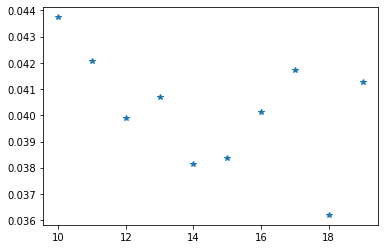

In [113]:
plt.plot(x,y,'*')

In [114]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [115]:
slope

-0.0003370909090909091

In [116]:
intercept


0.04510981818181819

E(X)= slope * n + intercept

In [144]:
yy = [(slope* p_value) + intercept for u in x ]

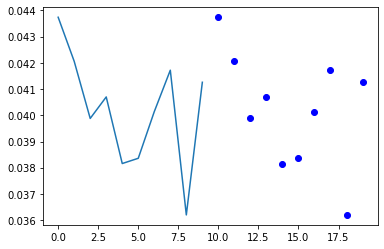

In [161]:
plt.plot(x,y,'ob',y)

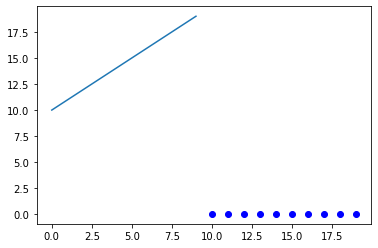

In [154]:
plt.plot(x,y,'ob',x)